#**1. A Statistical Analysis of CO2 Emissions**

##**1.1 Installing Libraries**

In [ ]:
!pip install rpy2==3.5.1
import pandas as pd
import numpy as np
%load_ext rpy2.ipython

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
%%R
install.packages("ggplot2")
library("ggplot2")
install.packages("DescTools")
library("DescTools")
install.packages("magrittr") # package installations are only needed the first time you use it
install.packages("dplyr")    # alternative installation of the %>%
library("magrittr") # needs to be run every time you start R and want to use %>%
library("dplyr")

(as ‘lib’ is unspecified)







	‘/tmp/RtmpQ12kmq/downloaded_packages’


(as ‘lib’ is unspecified)







	‘/tmp/RtmpQ12kmq/downloaded_packages’

(as ‘lib’ is unspecified)







	‘/tmp/RtmpQ12kmq/downloaded_packages’

(as ‘lib’ is unspecified)







	‘/tmp/RtmpQ12kmq/downloaded_packages’

Attaching package: ‘dplyr’



    filter, lag



    intersect, setdiff, setequal, union




##**1.3 Loading Data**

In [ ]:
%%R

df = read.csv("/content/MY2022 Fuel Consumption Ratings.csv")



In [ ]:
%%R
summary(df)

   Model.Year       Make              Model           Vehicle.Class     
 Min.   :2022   Length:946         Length:946         Length:946        
 1st Qu.:2022   Class :character   Class :character   Class :character  
 Median :2022   Mode  :character   Mode  :character   Mode  :character  
 Mean   :2022                                                           
 3rd Qu.:2022                                                           
 Max.   :2022                                                           
 Engine.Size.L.    Cylinders      Transmission        Fuel.Type        
 Min.   :1.200   Min.   : 3.000   Length:946         Length:946        
 1st Qu.:2.000   1st Qu.: 4.000   Class :character   Class :character  
 Median :3.000   Median : 6.000   Mode  :character   Mode  :character  
 Mean   :3.199   Mean   : 5.668                                        
 3rd Qu.:3.800   3rd Qu.: 6.000                                        
 Max.   :8.000   Max.   :16.000                          

##**1.4 Descriptive Statistics**

>>Measure of Frequency 

In [ ]:
%%R
print(min(df$CO2.Emissions.g.km.))

print(max(df$CO2.Emissions.g.km.))

print(which.min(df$CO2.Emissions.g.km.))   #1

print(which.max(df$CO2.Emissions.g.km.))   #2

[1] 94
[1] 608
[1] 461
[1] 134


    #1 Index of the car with the minimum emisssion i.e Hyundai IONIQ
    #2 Index of the car with maximum emission i.e Bugatti Chiron

>>Measure of Central Tendency

In [ ]:
%%R
print(mean(df$CO2.Emissions.g.km.))
print(median(df$CO2.Emissions.g.km.))
print(Mode(df$CO2.Emissions.g.km.))

[1] 259.1723
[1] 257
[1] 275
attr(,"freq")
[1] 15


>>Measure of Dispersion 

In [ ]:
%%R
print(sd(df$CO2.Emissions.g.km.))
print(var(df$CO2.Emissions.g.km.))

[1] 64.44315
[1] 4152.919


>>Measure of Position 

In [ ]:
%%R
print(IQR(df$CO2.Emissions.g.km.))
q1 <- quantile(df$CO2.Emissions.g.km., 0.25)
print(q1)
q3 <- quantile(df$CO2.Emissions.g.km., 0.75)
print(q3)

[1] 87.5
   25% 
213.25 
   75% 
300.75 


    # IQR is the Inter Quartile Range (q3-q1)
     > Any data points after the range of q3+1.5 is considered as an Outlier

>>Scatter Plot 

It shows the correlation between Co2 Emissions and Fuel Consumption Comb(City+Hwy)

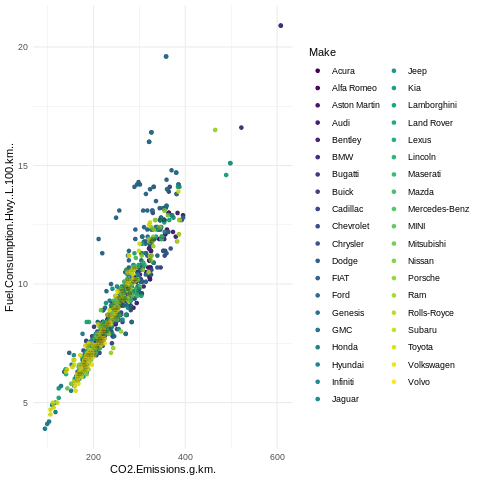

In [ ]:
%%R
ggplot(df, aes(x = CO2.Emissions.g.km., y = Fuel.Consumption.Hwy..L.100.km..)) +
  geom_point(aes(color = Make)) +
  geom_point(alpha = 0.04)+
  scale_color_viridis_d() +
  theme_minimal()

>>Histogram of CO2 Emissions 

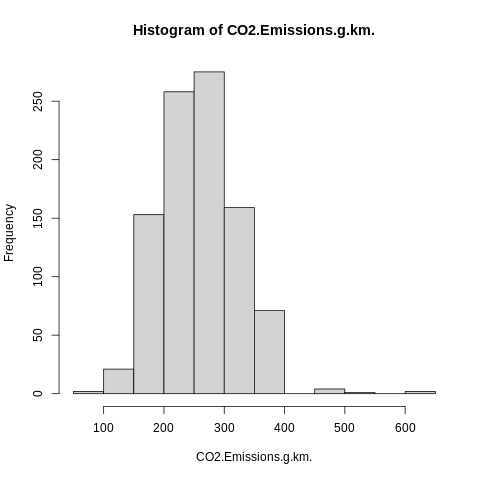

In [ ]:
%%R
mean(df$CO2.Emissions.g.km.)
attach(df)
hist(CO2.Emissions.g.km.)


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


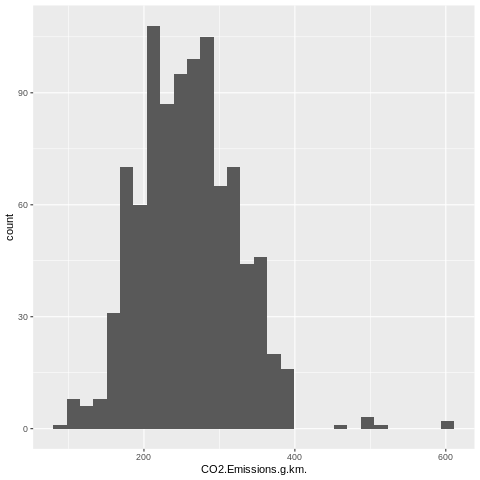

In [ ]:
%%R
ggplot(data = df) + 
geom_histogram(mapping = aes(x=CO2.Emissions.g.km.))

>>Boxplot of CO2 Emissions 

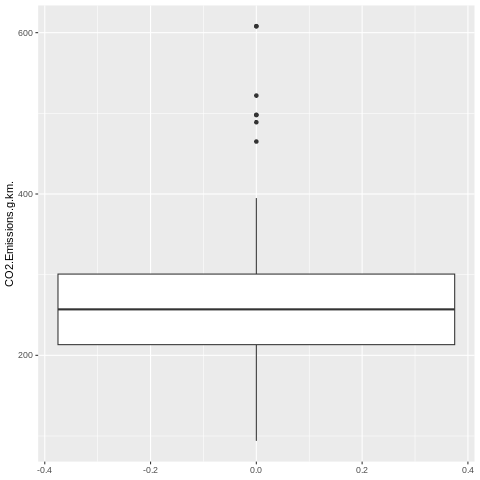

In [ ]:
%%R
ggplot(data = df) + 
geom_boxplot(mapping = aes(y=CO2.Emissions.g.km.))

    #Outliers can be seen in the boxplot 

>>When we consider the Vehicle Brands :

    
    Bugatti brand has the average highest number of CO2 Emissions
    Buick brand has the average lowest number of CO2 Emissions

In [ ]:
%%R
df1 <- df %>%
 select(Make,CO2.Emissions.g.km.)%>%
 filter(Make == "Buick" | Make == "Bugatti")%>%
 group_by(Make)%>%
 summarise(Average_CO2.Emissions= mean(CO2.Emissions.g.km.),Standard_d = sd(CO2.Emissions.g.km.),Range = range(CO2.Emissions.g.km.))
 
df1


`summarise()` has grouped output by 'Make'. You can override using the
`.groups` argument.
# A tibble: 4 × 4
# Groups:   Make [2]
  Make    Average_CO2.Emissions Standard_d Range
  <chr>                   <dbl>      <dbl> <int>
1 Bugatti                  579.       49.7   522
2 Bugatti                  579.       49.7   608
3 Buick                    217.       32.4   184
4 Buick                    217.       32.4   277


>>Flows

Flows of car brands with CO2 Emissions

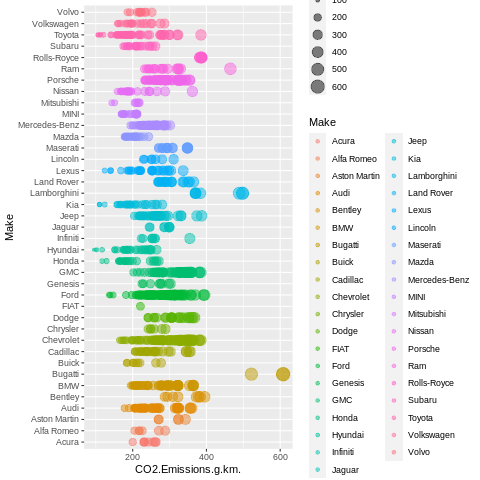

In [ ]:
%%R
df%>%
ggplot(aes(x=CO2.Emissions.g.km., y=Make,col=Make,size=CO2.Emissions.g.km.)) + 
geom_point(alpha=0.5) 

In [ ]:
%%R
df%>%
count(Fuel.Type)

  Fuel.Type   n
1         D  28
2         E  14
3         X 446
4         Z 458


##**1.5 Probability Distribution**

>**Normal Distribution**

In [ ]:
%%R
normally_distributed <- rnorm(947,     
                              mean = 0,    
                              sd = 1) 

prob_under_minus1 <- pnorm(q=-1,        
                     mean=0,
                     sd=1)

# Get prob of observing a value over 1
prob_over_1 <-  1-pnorm(q=1,            
                     mean=0,
                     sd=1)

# Prob between -1 and 1
between_prob <- 1-(prob_under_minus1+prob_over_1)  


print(prob_under_minus1)
print(prob_over_1)
print(between_prob)

[1] 0.1586553
[1] 0.1586553
[1] 0.6826895


This means that there is 15.86% data before -1, 15.86% data after 1 and 68.26% data between (-1,1) 

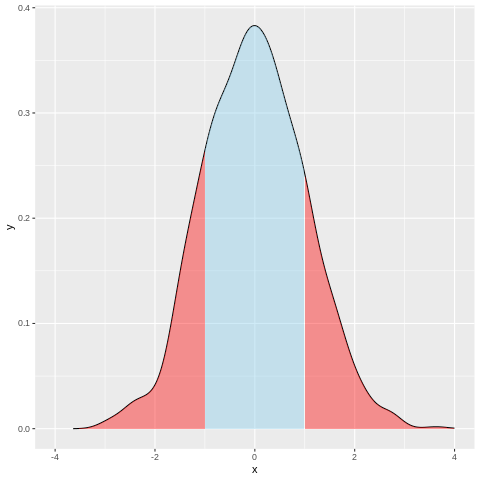

In [ ]:
%%R
norm_frame = with(density(normally_distributed),  # Create data frame density values
                  data.frame(x,y))  


myplot <- ggplot(data = norm_frame, aes(x = x, y = y)) +   # Create the plot
       geom_line() +
       geom_ribbon(data=subset(norm_frame,x < -1),
                   aes(ymax=y, ymin=0),
                   fill="red", 
                   alpha=0.4) +
       geom_ribbon(data=subset(norm_frame,x > 1),
                   aes(ymax=y, ymin=0),
                   fill="red", 
                   alpha=0.4) +
       geom_ribbon(data=subset(norm_frame,x > -1 & x < 1),
                   aes(ymax=y, ymin=0),
                   fill="skyblue", 
                   alpha=0.4) +
       xlim(-4,4)

myplot

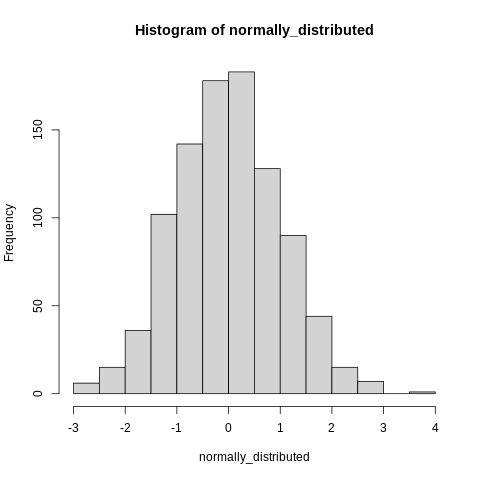

In [ ]:
%%R
hist(normally_distributed)

>Question: Assuming that the fuel consumption of a vehicle in a city fits a normal distribution. Furthermore, the mean consumption is 12.5 L/100Km, and the standard deviation is 3.452. What is the percentage of vehicles consuming 10 L/100Km of Fuel or more? Compare the same case with Fuel Consumption in Highway.

(Mean and sd for highway is 9.63 L/100Km and 2.285)

In [ ]:
%%R
X_City <- pnorm(10, mean=12.5, sd=3.452, lower.tail=FALSE) 
X_Hwy <-pnorm(10, mean=9.63, sd=2.285, lower.tail=FALSE)
print(X_City)
print(X_Hwy)

[1] 0.765534
[1] 0.4356822


We can conclude that Highway is more efficient. Since, only 43% of vehicles will consume 10L/Km of Fuel compared to that of City i.e 76%.

This can be due to factors such as traffic, turns or parking time etc

>**Poisson Distribution**

>Question: If the **CO2 Emissions** per vehicle is 277.24 g/km, find the probability of having 350 g/km emissions for a particular vehicle?

C02_EMISSION_Rate
232 235 237 241 243 244 246 249 250 251 252 253 254 255 256 257 258 259 260 261 
  1   1   1   2   2   1   1   6   1   1   6   2   5   4  10   3   5   3   8   8 
262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277 278 279 280 281 
  5   6   6   6   9   6   7   2   5   7   8  10  11   9   9  11   6  10   9   6 
282 283 284 285 286 287 288 289 290 291 292 293 294 295 296 297 298 299 301 302 
  6  11   5   6  10   7   7   7   5   8   7   3   5   3   5   3   4   6   3   2 
303 304 305 306 307 308 310 311 312 314 315 316 
  3   4   2   1   1   1   1   1   1   1   1   1 
[1] 0.05232837
[1] 3.18996e-06


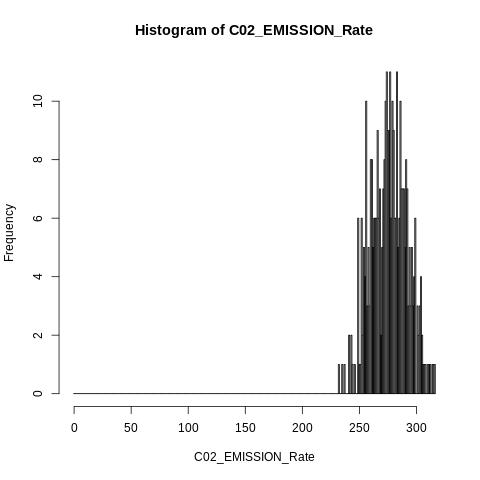

In [ ]:
%%R
set.seed(12)
C02_EMISSION_Rate <- rpois(n = 350,
                        lambda = 277.24)        

print(table(C02_EMISSION_Rate))

hist(C02_EMISSION_Rate,
     breaks=seq(-0.5,max(C02_EMISSION_Rate)+0.5,1))

print(ppois(q=250,           
      lambda=277.24))     
print(dpois(x=350,           
      lambda=277.24))

>>**Multinomial** 

    We can find the frequency distribution of Fuel.Type with the table function.

In [ ]:
%%R
table(df$Fuel.Type)


  D   E   X   Z 
 28  14 446 458 


    The computation of probability mass function (pmf) using Multinomial model

In [ ]:
%%R
pd<-28/946       #probability of D fuel type
pe<-14/946       #probability of E fuel type
px<-446/946      #probability of X fuel type
pz<-458/946      #probability of Z fuel type
library(nnet)
p  <- c(pd,pe,px,pz)
norm <- dmultinom(x= c(28,14,446,458), size = 946, p)
norm


[1] 0.0002162387


###**ChiSquare Test**

In [ ]:
%%R
summary(df$CO2.Emissions.g.km.)
chisq.test(df$CO2.Emissions.g.km.,df$Fuel.Consumption.Hwy..L.100.km..)


	Pearson's Chi-squared test

data:  df$CO2.Emissions.g.km. and df$Fuel.Consumption.Hwy..L.100.km..
X-squared = 46980, df = 25546, p-value < 2.2e-16



     We reject our null hypothesis in this situation as the p < 0.05. We compare difference with respect to some variable in two groups, then it 
     means both groups have significance differences in the mean values of that variable.Which also indicates that Co2 Emissions and 
     Fuel Consumption.Hwy are dependent on each other. 
     
     To cross verify, we will answer a series of questions.

**Questions**
1. Boxplot of Co2 Emissions?

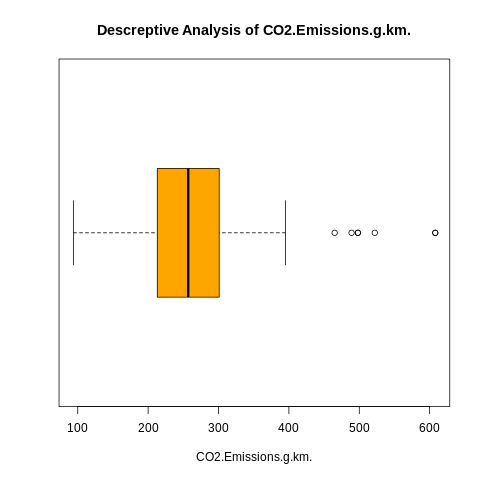

In [ ]:
%%R
boxplot(df$CO2.Emissions.g.km.,col="orange",
        main="Descreptive Analysis of CO2.Emissions.g.km.",horizontal=TRUE,xlab="CO2.Emissions.g.km.")

2. Distribution of Co2 Emissions?

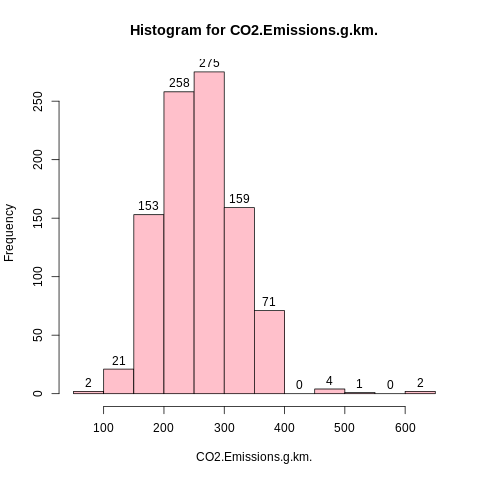

In [ ]:
%%R
hist(df$CO2.Emissions.g.km.,col="pink",
     xlab="CO2.Emissions.g.km.",
     ylab="Frequency",
     main="Histogram for CO2.Emissions.g.km.",
     labels=TRUE)

3. Relationship between Co2 Emissions and Fuel Consumption Hwy ?
>As seen and said above, both variables are dependent on each other 

[1] 0.9339908


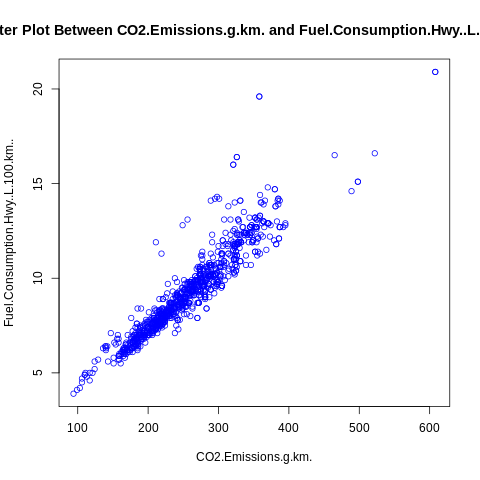

In [ ]:
%%R
plot(df$CO2.Emissions.g.km.,df$Fuel.Consumption.Hwy..L.100.km..,
    col="blue",
    main="Scatter Plot Between CO2.Emissions.g.km. and Fuel.Consumption.Hwy..L.100.km.. ",
    xlab="CO2.Emissions.g.km.",
    ylab="Fuel.Consumption.Hwy..L.100.km..")
cor(df$CO2.Emissions.g.km.,df$Fuel.Consumption.Hwy..L.100.km..)

##**1.6 Hypothesis Testing**

For sample mean **(Xbar)** we take a random sample data called **"CO2 Emissions Canada"** from kaggle and get the mean of Co2 Emissions.


In [ ]:
%%R
df_sample = read.csv("/content/CO2 Emissions_Canada.csv")
summary(df_sample)

     Make              Model           Vehicle.Class      Engine.Size.L.
 Length:7385        Length:7385        Length:7385        Min.   :0.90  
 Class :character   Class :character   Class :character   1st Qu.:2.00  
 Mode  :character   Mode  :character   Mode  :character   Median :3.00  
                                                          Mean   :3.16  
                                                          3rd Qu.:3.70  
                                                          Max.   :8.40  
   Cylinders      Transmission        Fuel.Type        
 Min.   : 3.000   Length:7385        Length:7385       
 1st Qu.: 4.000   Class :character   Class :character  
 Median : 6.000   Mode  :character   Mode  :character  
 Mean   : 5.615                                        
 3rd Qu.: 6.000                                        
 Max.   :16.000                                        
 Fuel.Consumption.City..L.100.km. Fuel.Consumption.Hwy..L.100.km.
 Min.   : 4.20                 

  >**Hypothesis Test of Mean**

Q.1 Suppose the vehicle manufacturer claims that the mean C02 Emissions of a vehicle is more than 259.17 g/km. In a sample of 7386 vehicle emissions, it was found that they only last 250.6 g/km on average. With the population standard deviation being 61.76. At .05 significance level,
can we reject the claim by the manufacturer?

In [ ]:
%%R
length(df_sample$Fuel.Consumption.Hwy..L.100.km.)

[1] 7385


    Claim : The average Co2 Emission of a car is more than 259.17 g/km.

In [ ]:
%%R
mean_co2 = mean(df$CO2.Emissions.g.km.)
sd_co2 = sd(df$CO2.Emissions.g.km.)
var_co2 = var(df$CO2.Emissions.g.km.)
xbar = 250.6
print(mean_co2)
print(sd_co2)
n = 7385    #sample size

# Hypothesis:

# H0: mu>259.1723 , H1: mu <= 259.1723 ; lower one tailed_test
alpha=0.05                      #Confidence level is 95%

test_value=(xbar-mean_co2)/sqrt(var_co2/n)
print(test_value)

c_value=qnorm(alpha)            # lower one-tailed test
print(c_value)




[1] 259.1723
[1] 64.44315
[1] -11.43131
[1] -1.644854


    Conclusion : The test value -11.4320 is less than the critical value of -1.6449. Hence, at .05 significance level, 
    we reject the claim that average Co2 Emission of a car is more than 259.17 g/km.

In [ ]:
%%R
pnorm(test_value)

[1] 1.45834e-30


we used pnorm as an alternative to this question as the p value here is close to zero and less than 0.05, we reject the null hypothesis that mu>259.17.

>**Hypothesis test of variance**

In [ ]:
%%R
print(sd(df_sample$CO2.Emissions.g.km.))
print(var(df$CO2.Emissions.g.km.))
print(var(df_sample$CO2.Emissions.g.km.))

[1] 58.51268
[1] 4152.919
[1] 3423.734


We want to make sure that data has a consistent application rate, in other words, low variability not exceeding 0.25 g/Km. We collects sample data (n = 7385) and get a sample variance of 3423.7. Using a 5% level of significance, test the claim that the variance is significantly greater than 3423.\
(Assuming σ02 = 3423)

In [ ]:
%%R
#Hypothesis-1:
#H0: σ2 > σ02  
#H1: σ2 ≤ σ02 
alpha <- 0.05
n <- 7385
sample_var <- 3423.734
pop_var <- 4152.919

test_value <- ((n-1)*sample_var)/(pop_var)
print(test_value)

c1_value <- qchisq(0.05, 7384)
print(c1_value)



#Hypothesis-2:
#H0: σ2 < σ02  
#H1: σ2 ≥ σ02 
c2_value = qchisq((1-0.05), 7384)
print(c2_value)


#Hypotheis-3 :
#H0: σ2 = σ02  
#H1: σ2 ≠ σ02

c3_value1 = qchisq(0.025, 7384)
c3_value2 = qchisq(0.975, 7384)
print(c3_value1)

print(c3_value2)


[1] 6087.49
[1] 7185.255
[1] 7585.019
[1] 7147.718
[1] 7624.071


    Conclusion : The test value 6087 is less than the critical values of 7185, 7585. And does not lie between 7147 and 7624.
    Hence, at .05 significance level, we reject all the Hypothesis.

>**Hypothesis Test of Proportion** 

>1. The proportion of BMW with respect to Fuel.Type in **MY2022 Fuel Consumption Ratings** data is less than that of in **sample dataset**.

>Here we use prop.test to cross verify our claim. Proportion HT of Make column in both population and sample data.

In [ ]:
%%R
table(df$Make,df$Fuel.Type)

               
                 D  E  X  Z
  Acura          0  0  0  8
  Alfa Romeo     0  0  0  6
  Aston Martin   0  0  0  5
  Audi           0  0  5 40
  Bentley        0  0  0  8
  BMW            0  0  0 60
  Bugatti        0  0  0  3
  Buick          0  0  9  0
  Cadillac       1  0  2 23
  Chevrolet     11  3 48 18
  Chrysler       0  0  6  0
  Dodge          0  0  8 13
  FIAT           0  0  1  0
  Ford           0  8 79  2
  Genesis        0  0  0  8
  GMC            9  3 34  8
  Honda          0  0 22  1
  Hyundai        0  0 24  5
  Infiniti       0  0  0  8
  Jaguar         0  0  0  8
  Jeep           4  0 28  2
  Kia            0  0 24  1
  Lamborghini    0  0  0  8
  Land Rover     0  0  0 18
  Lexus          0  0  9 19
  Lincoln        0  0  7  0
  Maserati       0  0  0 13
  Mazda          0  0 21  2
  Mercedes-Benz  0  0  0 43
  MINI           0  0  0 20
  Mitsubishi     0  0  7  0
  Nissan         0  0 21  2
  Porsche        0  0  0 77
  Ram            3  0 12  1
  Ro

In [ ]:
%%R
prop.test(x=c(0,0,0,60),n=c(1+11+4+3,3+8+3,5+9+2+48+6+8+1+79+34+22+24+28+24+9+7+21+7+21+12+15+47+16+1,
                            8+6+5+40+8+60+3+23+18+13+2+8+8+1+5+8+8+2+1+8+18+19+13+2+43+20+2+77+1+7+4+4+2+111), correct=FALSE)


	4-sample test for equality of proportions without continuity correction

data:  c(0, 0, 0, 60) out of c(1 + 11 + 4 + 3, 3 + 8 + 3, 5 + 9 + 2 + 48 + 6 + 8 + 1 + 79 + 34 + 22 + 24 + 28 + 24 + 9 + 7 + 21 + 7 + 21 + 12 + 15 + 47 + 16 + 1, 8 + 6 + 5 + 40 + 8 + 60 + 3 + 23 + 18 + 13 + 2 + 8 + 8 + 1 + 5 + 8 + 8 + 2 + 1 + 8 + 18 + 19 + 13 + 2 + 43 + 20 + 2 + 77 + 1 + 7 + 4 + 4 + 2 + 111)
X-squared = 54.668, df = 3, p-value = 8.081e-12
alternative hypothesis: two.sided
sample estimates:
   prop 1    prop 2    prop 3    prop 4 
0.0000000 0.0000000 0.0000000 0.1075269 



In [ ]:
%%R
table(df_sample$Make,df_sample$Fuel.Type)

               
                  D   E   N   X   Z
  ACURA           0   0   0   0  72
  ALFA ROMEO      0   0   0   0  30
  ASTON MARTIN    0   0   0   0  47
  AUDI           17   0   0  27 242
  BENTLEY         0   0   0   0  46
  BMW            21   0   0   0 506
  BUGATTI         0   0   0   0   3
  BUICK           0   6   0  69  28
  CADILLAC        0   2   0  63  93
  CHEVROLET      30  77   1 388  92
  CHRYSLER        0  25   0  62   1
  DODGE           0  35   0 144  67
  FIAT            0   0   0  73   0
  FORD           14 111   0 489  14
  GENESIS         0   0   0   4  21
  GMC            17  69   0 209  33
  HONDA           0   0   0 196  18
  HYUNDAI         0   0   0 201   9
  INFINITI        0   0   0   4 104
  JAGUAR          8   6   0   0 146
  JEEP            6  12   0 223  10
  KIA             0   0   0 224   7
  LAMBORGHINI     0   0   0   0  41
  LAND ROVER     10   8   0   0  67
  LEXUS           0   0   0  43 135
  LINCOLN         0   1   0  95   0
  MASERATI  

In [ ]:
%%R
prop.test(x=c(21,0,0,0,506),n=c(175,370,1,3637,3202), correct=FALSE)


	5-sample test for equality of proportions without continuity correction

data:  c(21, 0, 0, 0, 506) out of c(175, 370, 1, 3637, 3202)
X-squared = 677.16, df = 4, p-value < 2.2e-16
alternative hypothesis: two.sided
sample estimates:
   prop 1    prop 2    prop 3    prop 4    prop 5 
0.1200000 0.0000000 0.0000000 0.0000000 0.1580262 



    We applied the prop.test function to compute the p-value directly and hence got the proportion test as two sided in both the cases. 
 

Conclusion : 

 *The notebook takes 115 seconds to run.*